<a href="https://colab.research.google.com/github/rajatjpatel/Bazaar/blob/main/Fibonacci_Retracement_Levels_%26_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Fibonacci Retracement Levels & MACD

In [ ]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data 
from google.colab import files
files.upload()

Saving S&P.csv to S&P.csv


{'S&P.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2000-09-18,1485.250000,1489.750000,1436.750000,1468.500000,1468.500000,513776\n2000-09-25,1469.500000,1481.000000,1438.250000,1454.000000,1454.000000,449847\n2000-10-02,1453.750000,1474.000000,1411.500000,1426.250000,1426.250000,462636\n2000-10-09,1425.250000,1426.750000,1339.000000,1386.250000,1386.250000,502287\n2000-10-16,1386.000000,1422.000000,1324.000000,1411.000000,1411.000000,457703\n2000-10-23,1411.000000,1428.750000,1348.500000,1401.000000,1401.000000,494895\n2000-10-30,1398.000000,1445.500000,1387.000000,1436.750000,1436.750000,428874\n2000-11-06,1436.000000,1455.000000,1370.500000,1372.250000,1372.250000,410926\n2000-11-13,1369.000000,1404.500000,1335.000000,1370.500000,1370.500000,583101\n2000-11-20,1369.750000,1373.500000,1320.250000,1346.500000,1346.500000,266221\n2000-11-27,1348.500000,1367.750000,1296.750000,1320.750000,1320.750000,506080\n2000-12-04,1323.000000,1384.250000,1313.250000,1353.250000,1353.250000,306

In [ ]:
#Show the Data
df = pd.read_csv('S&P.csv')
#Set Date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show DF
df

,Date,Open,High,Low,Close,Adj Close,Volume
2000-09-18,2000-09-18,1485.25,1489.75,1436.75,1468.500000,1468.500000,513776
2000-09-25,2000-09-25,1469.50,1481.00,1438.25,1454.000000,1454.000000,449847
2000-10-02,2000-10-02,1453.75,1474.00,1411.50,1426.250000,1426.250000,462636
2000-10-09,2000-10-09,1425.25,1426.75,1339.00,1386.250000,1386.250000,502287
2000-10-16,2000-10-16,1386.00,1422.00,1324.00,1411.000000,1411.000000,457703
...,...,...,...,...,...,...,...
2021-03-08,2021-03-08,3854.75,3958.50,3796.25,3942.250000,3942.250000,8797039
2021-03-15,2021-03-15,3945.75,3988.75,3908.00,3912.620117,3912.620117,5085811
2021-03-22,2021-03-22,3893.50,3968.00,3843.25,3964.750000,3964.750000,9530991
2021-03-29,2021-03-29,3962.25,4038.00,3928.75,4010.000000,4010.000000,6546300


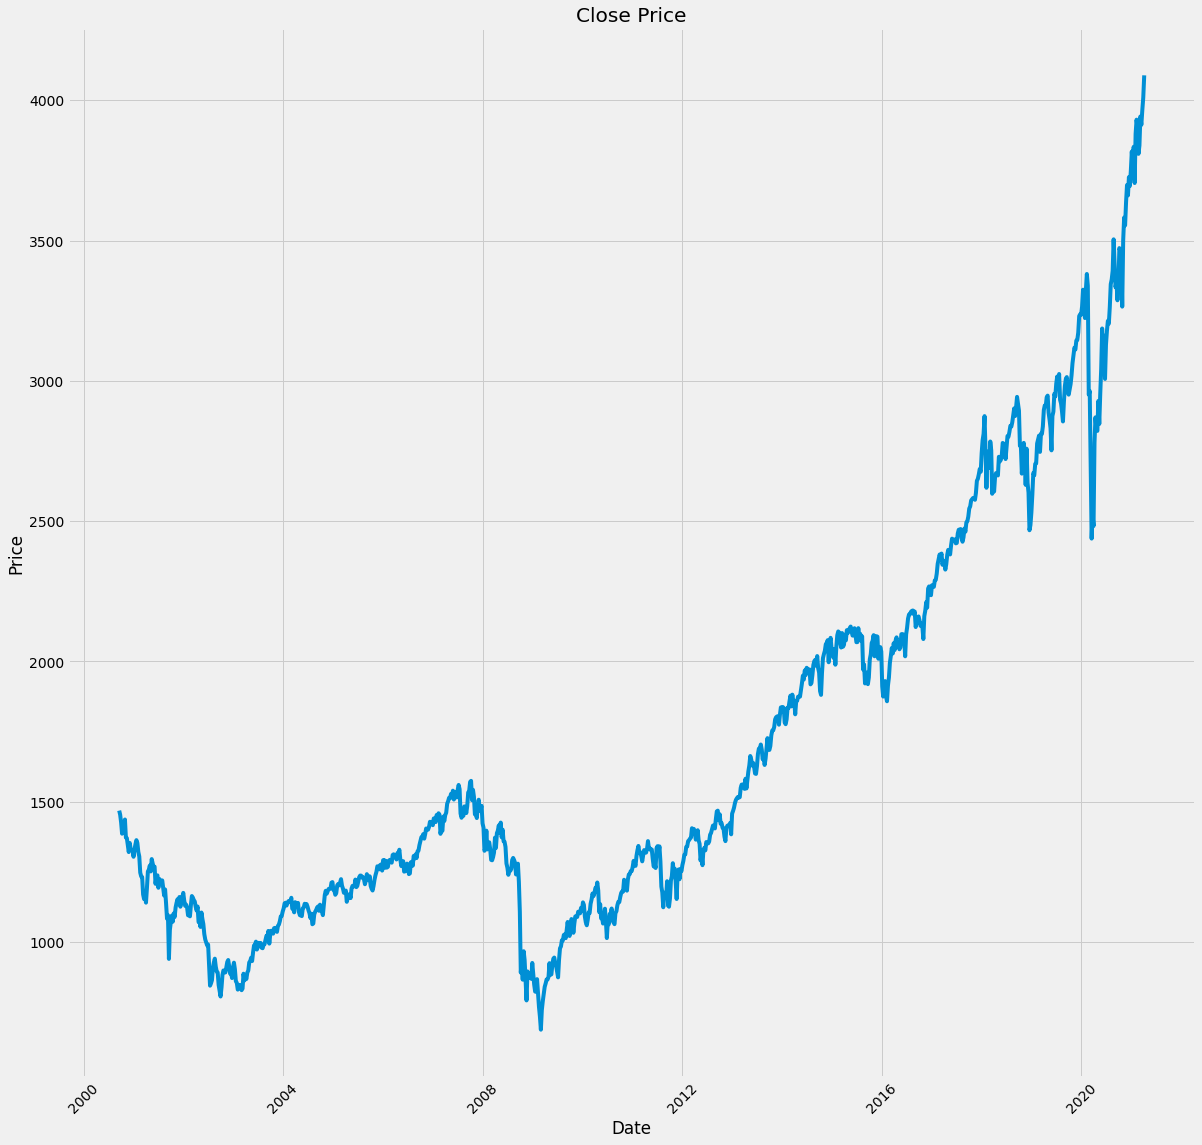

In [ ]:
#plot the data
plt.figure(figsize=(18,18))
plt.plot(df.Close)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show() 

In [ ]:
#Calculate the Fibonacci Retracement Levels
max_price = df['Close'].max()
min_price = df['Close'].min()

difference = max_price - min_price
first_level = max_price - difference * 0.236
second_level = max_price - difference * 0.382
third_level = max_price - difference * 0.50
fourth_level = max_price - difference * 0.618
fifth_level = max_price - difference * 0.786

In [ ]:
#Calculate the MACD Line and the Signal line Indicators
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA =df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

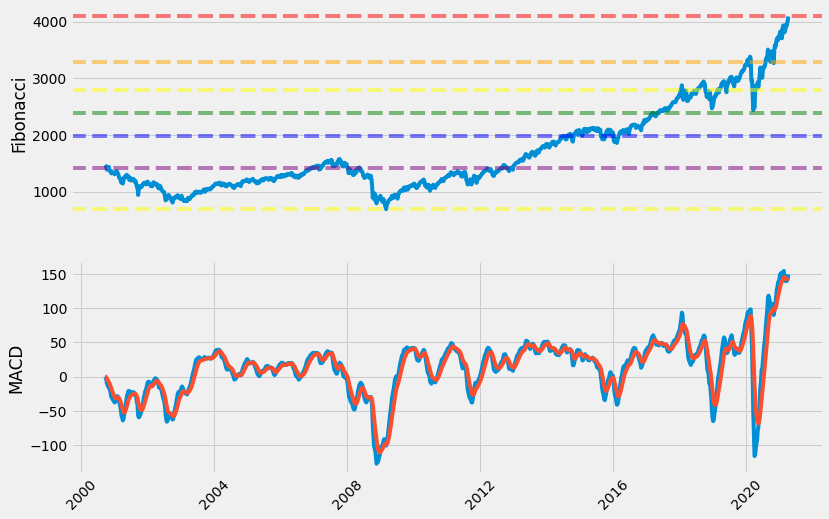

In [ ]:
#Plot Fibonacci
new_df = df
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(new_df.index, new_df['Close'])
plt.axhline(max_price, linestyle= '--', alpha=0.5, color='red')
plt.axhline(first_level, linestyle= '--', alpha=0.5, color='orange')
plt.axhline(second_level, linestyle= '--', alpha=0.5, color='yellow')
plt.axhline(third_level, linestyle= '--', alpha=0.5, color='green')
plt.axhline(fourth_level, linestyle= '--', alpha=0.5, color='blue')
plt.axhline(fifth_level, linestyle= '--', alpha=0.5, color='purple')
plt.axhline(min_price, linestyle= '--', alpha=0.5, color='yellow')
plt.ylabel('Fibonacci')
frame1= plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.subplot(2,1,2)
plt.plot(new_df.index, MACD)
plt.plot(new_df.index, signal)
plt.ylabel('MACD')
plt.xticks(rotation=45)

plt.savefig('Fig1.png')

In [ ]:
#Data Frame
df['MACD'] = MACD
df['Signal Line'] = signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2000-09-18,2000-09-18,1485.25,1489.75,1436.75,1468.500000,1468.500000,513776,0.000000,0.000000
2000-09-25,2000-09-25,1469.50,1481.00,1438.25,1454.000000,1454.000000,449847,-1.156695,-0.231339
2000-10-02,2000-10-02,1453.75,1474.00,1411.50,1426.250000,1426.250000,462636,-4.263431,-1.037757
2000-10-09,2000-10-09,1425.25,1426.75,1339.00,1386.250000,1386.250000,502287,-9.839781,-2.798162
2000-10-16,2000-10-16,1386.00,1422.00,1324.00,1411.000000,1411.000000,457703,-12.122223,-4.662974
...,...,...,...,...,...,...,...,...,...
2021-03-08,2021-03-08,3854.75,3958.50,3796.25,3942.250000,3942.250000,8797039,141.779260,143.707533
2021-03-15,2021-03-15,3945.75,3988.75,3908.00,3912.620117,3912.620117,5085811,139.351314,142.836289
2021-03-22,2021-03-22,3893.50,3968.00,3843.25,3964.750000,3964.750000,9530991,140.019536,142.272939
2021-03-29,2021-03-29,3962.25,4038.00,3928.75,4010.000000,4010.000000,6546300,142.557095,142.329770


In [ ]:
#Creating a Function
def getLevels(price):
  if price >= first_level:
    return (max_price, first_level)
  elif price >= second_level:
    return (first_level, second_level)
  elif price >= third_level:
    return (second_level, third_level)
  elif price >= fourth_level:
    return (third_level, fourth_level)
  elif price >= fifth_level:
    return (fifth_level, min_price)
  else:
    return (fifth_level, min_price)          

In [ ]:
#Strategy
def strategy(df):
  buy_list = []
  sell_list = []
  flag = 0
  last_buy_price = 0

  for i in range(0, df.shape[0]):
    price = df['Close'][i]
    if i == 0:
      upper_lvl, lower_lvl = getLevels(price)
      buy_list.append(np.nan)
      sell_list.append(np.nan)
    elif price >= upper_lvl or price <= lower_lvl:
      if df['Signal Line'][i] > df['MACD'][i] and flag == 0:
        last_buy_price = price
        buy_list.append(price)
        sell_list.append(np.nan)
        flag = 1
      elif df['Signal Line'][i] > df['MACD'][i] and flag == 1 and price >= last_buy_price:
        buy_list.append(np.nan)
        sell_list.append(price)
        flag = 0
      else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)
    else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)

    upper_lvl, lower_lvl = getLevels(price)
  return buy_list, sell_list         


In [ ]:
#Buy & Sell
buy, sell = strategy(df)
df['Buy_Signal_Price'] = buy
df['Sell_Signal_Price'] = sell
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy,Sell,Buy_Price,Sell_Price,Buy_Signal_Price,Sell_Signal_Price
2000-09-18,2000-09-18,1485.25,1489.75,1436.75,1468.500000,1468.500000,513776,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-25,2000-09-25,1469.50,1481.00,1438.25,1454.000000,1454.000000,449847,-1.156695,-0.231339,1454.0,NaN,1454.0,NaN,1454.0,NaN
2000-10-02,2000-10-02,1453.75,1474.00,1411.50,1426.250000,1426.250000,462636,-4.263431,-1.037757,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-09,2000-10-09,1425.25,1426.75,1339.00,1386.250000,1386.250000,502287,-9.839781,-2.798162,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-16,2000-10-16,1386.00,1422.00,1324.00,1411.000000,1411.000000,457703,-12.122223,-4.662974,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,2021-03-08,3854.75,3958.50,3796.25,3942.250000,3942.250000,8797039,141.779260,143.707533,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15,2021-03-15,3945.75,3988.75,3908.00,3912.620117,3912.620117,5085811,139.351314,142.836289,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-22,2021-03-22,3893.50,3968.00,3843.25,3964.750000,3964.750000,9530991,140.019536,142.272939,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,2021-03-29,3962.25,4038.00,3928.75,4010.000000,4010.000000,6546300,142.557095,142.329770,NaN,NaN,NaN,NaN,NaN,NaN


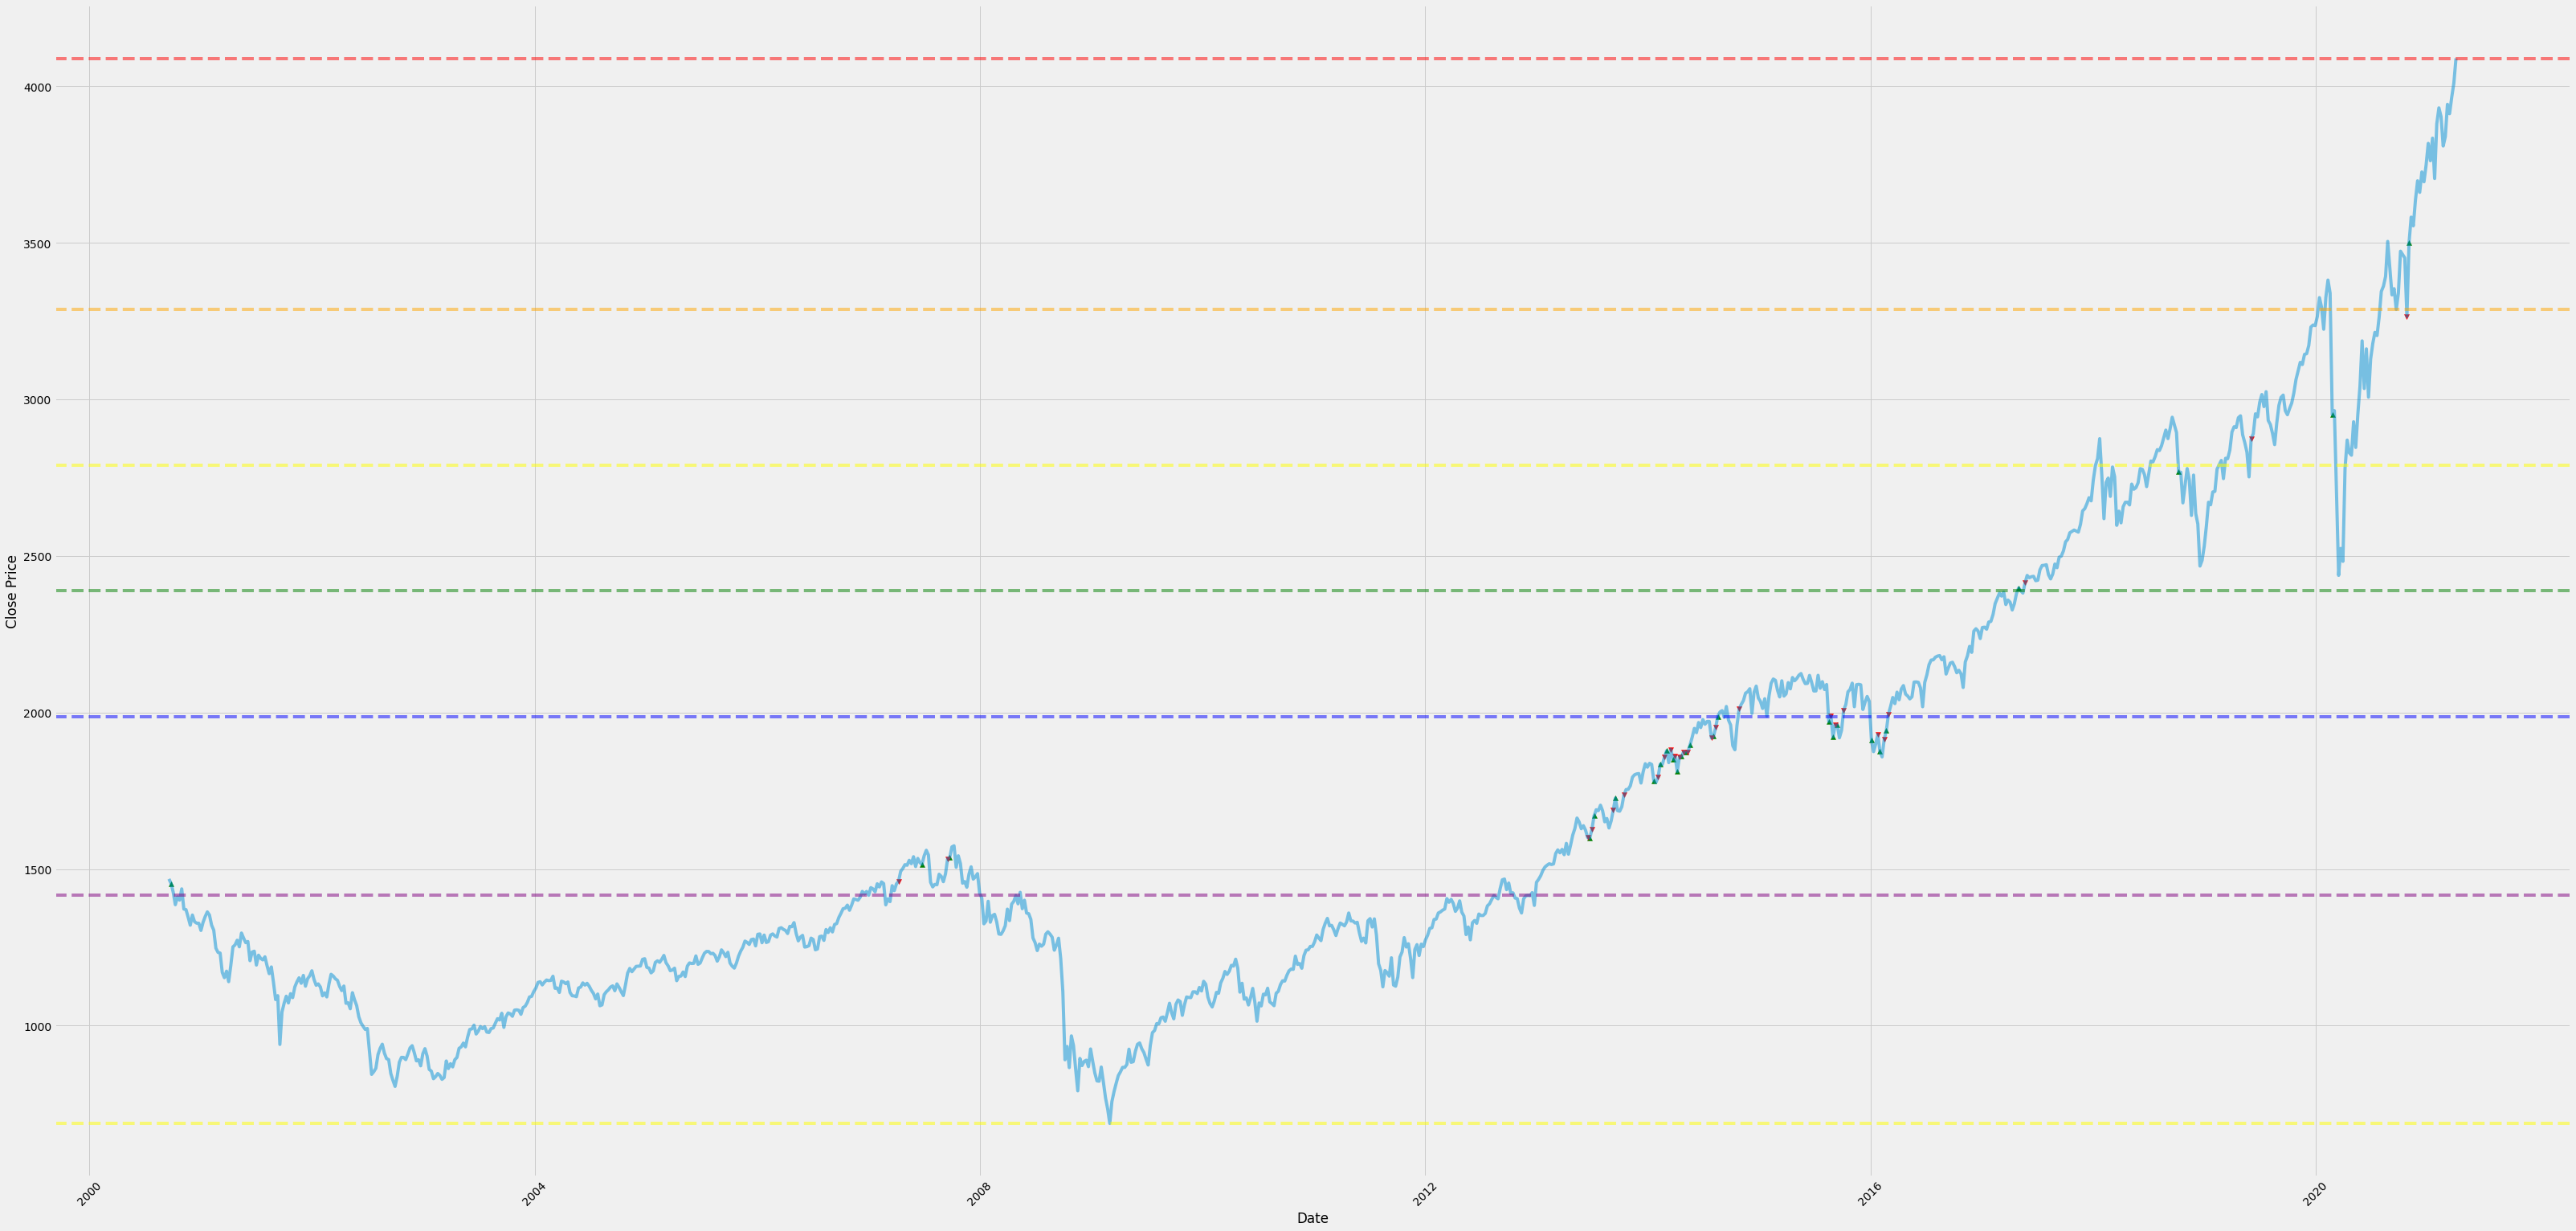

In [ ]:
new_df = df
plt.figure(figsize=(50,25))
plt.plot(new_df.index, new_df['Close'], alpha=0.5)
plt.scatter(new_df.index, new_df['Buy_Signal_Price'], color='green', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell_Signal_Price'], color='red', marker='v', alpha=1)
plt.axhline(max_price, linestyle= '--', alpha=0.5, color='red')
plt.axhline(first_level, linestyle= '--', alpha=0.5, color='orange')
plt.axhline(second_level, linestyle= '--', alpha=0.5, color='yellow')
plt.axhline(third_level, linestyle= '--', alpha=0.5, color='green')
plt.axhline(fourth_level, linestyle= '--', alpha=0.5, color='blue')
plt.axhline(fifth_level, linestyle= '--', alpha=0.5, color='purple')
plt.axhline(min_price, linestyle= '--', alpha=0.5, color='yellow')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()